In [1]:
import heeps
from heeps.util.img_processing import resize_img
from heeps.util.freq_decomp import conv_kernel, spatial
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


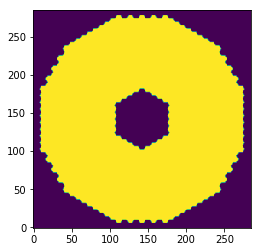

In [2]:
nimg = 511
npupil = 285
mask = resize_img(fits.getdata('/Users/cdelacroix/INSTRUMENTS/METIS/ELT_pupils/mask_M1.fits'), nimg)
mask_pupil = resize_img(mask, npupil)
imshow(mask_pupil, origin=True)

58.730614


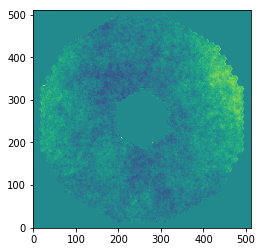

In [4]:
def DIFF(IMGP, SCAP): # odd-centered (511x511) 
    return np.float32(fits.open(IMGP)[1].data - fits.open(SCAP)[1].data)[1:,1:]
IMGP = '/Users/cdelacroix/INSTRUMENTS/METIS/NCPA/Tibor_Andre/Talbot_LM_20201120/IMGP_rep_1_field_50.fits'
SCAP = '/Users/cdelacroix/INSTRUMENTS/METIS/NCPA/Tibor_Andre/Talbot_LM_20201120/SCAP_rep_1_field_50.fits'
ncpa = DIFF(IMGP, SCAP) * 1e9       # convert to nm
ncpa -= np.mean(ncpa[mask!=0])      # remove piston
ncpa *= mask                        # mask
imshow(ncpa, origin=True)
fits.writeto('DIFF_LM_20201119_fullM1.fits', np.float32(ncpa), overwrite=True)
print(np.std(ncpa))



rms(all SF) = 71.60
rms(LSF) = 60.13
rms(HSF) = 36.64


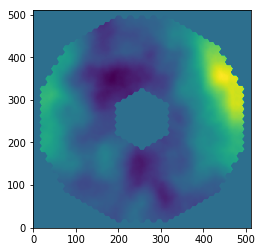

In [5]:
cpp = 10
pupil_img_size = 39.9988
diam_nominal = 38.542
nkernel = nimg*diam_nominal/pupil_img_size
kernel = conv_kernel(nkernel, cpp)
ncpa_allSF, ncpa_LSF, ncpa_HSF = spatial(ncpa, kernel, norm=True, verbose=True)
imshow(ncpa_LSF*mask, origin=True)
#fits.writeto(file_ncpa_screens%('allSF', cpp, npupil), np.float32(ncpa_allSF))
#fits.writeto(file_ncpa_screens%('LSF', cpp, npupil), np.float32(ncpa_LSF))
#fits.writeto(file_ncpa_screens%('HSF', cpp, npupil), np.float32(ncpa_HSF))
#print('NCPA spatial files created.')

In [6]:
ncpa_allSF.shape

(511, 511)

In [8]:
np.min(ncpa_HSF[ncpa_HSF!=0])

-9.942263

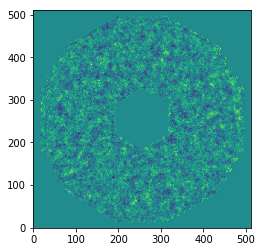

In [5]:
imshow(ncpa_HSF*mask, origin=True)


88.93243
rms(all SF) = 88.93
rms(LSF) = 80.92
rms(HSF) = 34.28


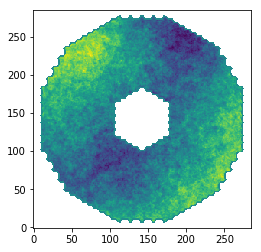

In [4]:
ncpa = fits.getdata('/Users/cdelacroix/INSTRUMENTS/METIS/NCPA/Tibor_Andre/DIFF_LM_20201119/DIFF_rep_1_field_50.fits')[1:,1:]*1e6
ncpa[maskM1==0] = np.nan

npupil = 285
ncpa = resize_img(ncpa, npupil)
ncpa -= np.nanmean(ncpa)
imshow(ncpa, origin=True)
#fits.writeto('DIFF_LM_20201119_fullM1.fits', resize_img(ncpa, 285), overwrite=True)
print(np.nanstd(ncpa))
cpp = 10
kernel = conv_kernel(ncpa.shape[0], cpp)
ncpa_allSF, ncpa_LSF, ncpa_HSF = spatial(ncpa, kernel, new_size=npupil,\
            norm=True, verbose=True)


306.3315928417182

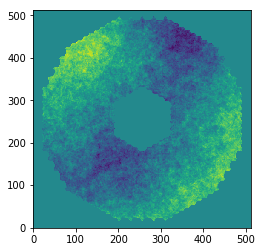